## Bose et al. 2015

fig. 4 in this paper has a median redshift of formation for friend-of-friend groups s.t. $z_{form}(M_{200})$.

goal: to see if it's possible to trace the redshift of formation (or exceeding our mass cut) for the subhalo pop.

so.... this didn't work like I thought, need to look into how I'm tracing the subhalo populations (this might get more complicated than I thought?)

In [183]:
import os
import tqdm
import numpy as np
import pickle
from helpers.SimulationAnalysis import SimulationAnalysis, readHlist
import matplotlib.pylab as plt


#......new imports (helper class)
import sys
sys.path.insert(0, '../scripts') # adding to the system path
from hlistHelper import hlist


%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}
plt.rc("text", usetex=True)
plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = 'cm'
custom_wdm_colors = ["#FFBB99", "#FF9966", "#FF7733", "#FF5500", "#CC4400", "#993300", "#662200","#000000"]
custom_fdm_colors = ["#d2b7e5","#c19ee0","#b185db","#a06cd5","#815ac0","#6247aa"]
custom_idm_colors = ["#77bba3","#467a69","#325d50"]


sim_colors = {}
sim_colors['cdm'] = 'k'
sim_colors['wdm_3'] = custom_wdm_colors[0]
sim_colors['wdm_4'] = custom_wdm_colors[1]
sim_colors['wdm_5'] = custom_wdm_colors[2]
sim_colors['wdm_6'] = custom_wdm_colors[3]
sim_colors['wdm_6.5'] = custom_wdm_colors[4]
sim_colors['wdm_10'] = custom_wdm_colors[5]
sim_colors['fdm_25.9e-22eV'] = custom_fdm_colors[0]
sim_colors['fdm_69.4e-22eV'] = custom_fdm_colors[1]
sim_colors['fdm_113e-22eV'] = custom_fdm_colors[2]
sim_colors['fdm_151e-22eV'] = custom_fdm_colors[3]
sim_colors['fdm_185e-22eV'] = custom_fdm_colors[4]
sim_colors['fdm_490e-22eV'] = custom_fdm_colors[5]

In [3]:
halo_id = 'Halo004'
cdm = hlist(model='cdm', halo_id = halo_id)
cdm.load_hlists()
cdm.load_hmb()

In [ ]:
'''
get ids of initial pop. of subhalos at z = 0

for a in hlist:
    look at timestep a - 1
    
    find subhalo descendants
    find new desc_ids
    repeat
    
need to be saving:
    original halo id (?)
    mass
    redshift
    
want to plot: Mpeak/Mvir of the halo at z = 0 in comparison to z when halo exceeded mass cut (1.2e8 Msun/h)
'''

In [ ]:
discard, subhalos = cdm.get_a(1) 
halo_ids = subhalos[:]['id']


formation_history = np.array([subhalos[:]['Mvir'], subhalos[:]['Mpeak'], np.ones(1208)])
scales = reversed(sorted(cdm.dict.keys()))

for a in scales: # walks through the hlist dictionary in reverse order
    
    if a < 1.:
        isolated, discard = cdm.get_a(a)
        new_halo_idx = np.isin(isolated[:]['desc_id'], halo_ids)
        halo_ids = isolated[:]['id'][new_halo_idx]
        print(len(halo_ids))
#         formation_history = np.vstack((formation_history, np.array([isolated[:]['Mpeak'][new_halo_idx], isolated[:]['Mvir'][new_halo_idx], np.ones(1208) * a])))
    

## Lee et al. 2017

a quick look at the mass fraction of subhalos in CDM vs WDM (and other models?) subhalo populations, using

$M_{vir}/M_{peak}$ at $z = 0$

In [176]:
#...... parameters
halo_id = 'Halo004'
z = 0

#...... loading the models
cdm = hlist(halo_id=halo_id, model='cdm')
wdm_3 = hlist(halo_id=halo_id, model='wdm_3')
wdm_4 = hlist(halo_id=halo_id, model='wdm_4')
wdm_5 = hlist(halo_id=halo_id, model='wdm_5')
wdm_6 = hlist(halo_id=halo_id, model='wdm_6')
wdm_65 = hlist(halo_id=halo_id, model='wdm_6.5')
wdm_10 = hlist(halo_id=halo_id, model='wdm_10')

#...... intializing models, halo lists
cdm.load_hlists()
wdm_3.load_hlists()
wdm_4.load_hlists()
wdm_5.load_hlists()
wdm_6.load_hlists()
wdm_65.load_hlists()
wdm_10.load_hlists()

#...... intializing models, host main branch
cdm.load_hmb()
wdm_3.load_hmb()
wdm_4.load_hmb()
wdm_5.load_hmb()
wdm_6.load_hmb()
wdm_65.load_hmb()
wdm_10.load_hmb()

halos_cdm, subhalos_cdm = cdm.get_z(z)
halos_wdm_3, subhalos_wdm_3 = wdm_3.get_z(z)
halos_wdm_4, subhalos_wdm_4 = wdm_4.get_z(z)
halos_wdm_5, subhalos_wdm_5 = wdm_5.get_z(z)
halos_wdm_6, subhalos_wdm_6 = wdm_6.get_z(z)
halos_wdm_65, subhalos_wdm_65 = wdm_65.get_z(z)
halos_wdm_10, subhalos_wdm_10 = wdm_10.get_z(z)

val_cdm, cum_cdm, base_cdm, mass_cut_cdm  = cdm.shmf(z=z, return_masscut_idx=True)
val_wdm_3, cum_wdm_3, discard, mass_cut_wdm_3  = wdm_3.shmf(z=z, return_masscut_idx=True)
val_wdm_4, cum_wdm_4, discard, mass_cut_wdm_4  = wdm_4.shmf(z=z, return_masscut_idx=True)
val_wdm_5, cum_wdm_5, discard, mass_cut_wdm_5  = wdm_5.shmf(z=z, return_masscut_idx=True)
val_wdm_6, cum_wdm_6, discard, mass_cut_wdm_6  = wdm_6.shmf(z=z, return_masscut_idx=True)
val_wdm_65, cum_wdm_65, discard, mass_cut_wdm_65  = wdm_65.shmf(z=z, return_masscut_idx=True)
val_wdm_10, cum_wdm_10, discard, mass_cut_wdm_10  = wdm_10.shmf(z=z, return_masscut_idx=True)

In [177]:
def get_plottables(subhalo_arr, mass_cut):
    
    vals, bins = np.histogram(subhalo_arr[:]['Mvir'][mass_cut]/subhalo_arr[:]['Mpeak'][mass_cut], bins=np.linspace(0,1,11))
    cum_vals = np.cumsum(vals)
    
    return bins[1:], cum_vals


In [178]:
x_cdm, y_cdm = get_plottables(subhalos_cdm, mass_cut_cdm)
x_wdm_3, y_wdm_3 = get_plottables(subhalos_wdm_3, mass_cut_wdm_3)
x_wdm_4, y_wdm_4 = get_plottables(subhalos_wdm_4, mass_cut_wdm_4)
x_wdm_5, y_wdm_5 = get_plottables(subhalos_wdm_5, mass_cut_wdm_5)
x_wdm_6, y_wdm_6 = get_plottables(subhalos_wdm_6, mass_cut_wdm_6)
x_wdm_65, y_wdm_65 = get_plottables(subhalos_wdm_65, mass_cut_wdm_65)
x_wdm_10, y_wdm_10 = get_plottables(subhalos_wdm_10, mass_cut_wdm_10)

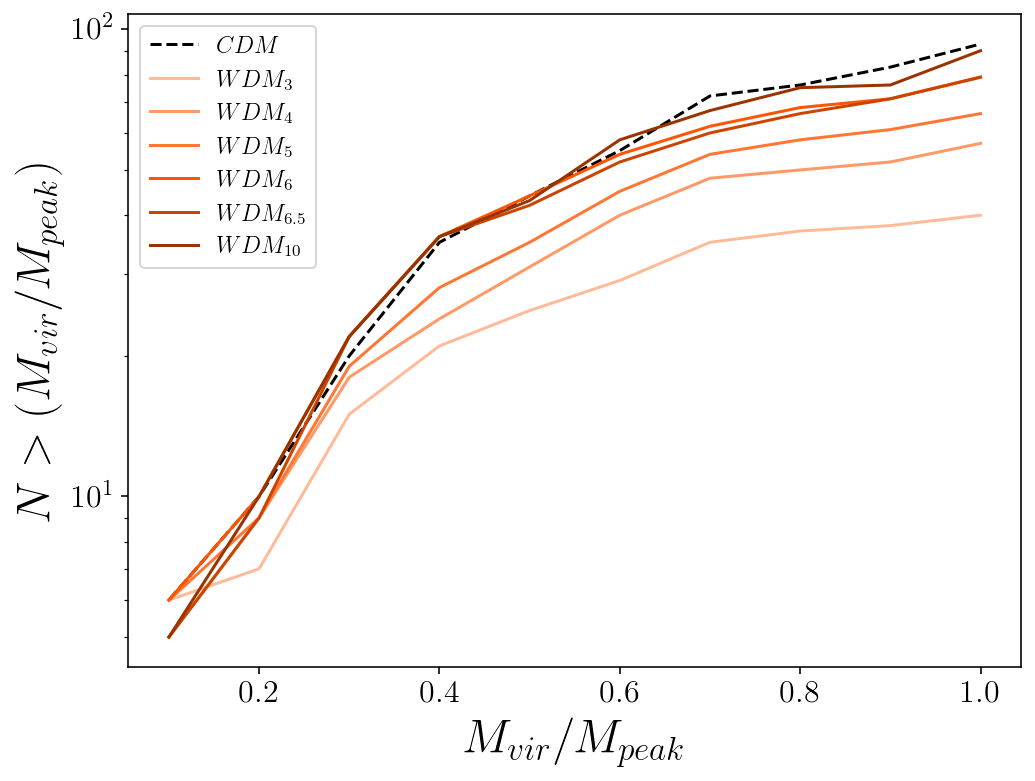

In [167]:
plt.figure(figsize=(8,6))
plt.yscale('log')

plt.plot(x_cdm, y_cdm, c=sim_colors['cdm'],label=r'$CDM$', ls='--')
plt.plot(x_wdm_3, y_wdm_3, c=sim_colors['wdm_3'],label=r'$WDM_3$')
plt.plot(x_wdm_4, y_wdm_4, c=sim_colors['wdm_4'],label=r'$WDM_4$')
plt.plot(x_wdm_5, y_wdm_5, c=sim_colors['wdm_5'],label=r'$WDM_5$')
plt.plot(x_wdm_6, y_wdm_6, c=sim_colors['wdm_6'],label=r'$WDM_6$')
plt.plot(x_wdm_65, y_wdm_65, c=sim_colors['wdm_6.5'],label=r'$WDM_{6.5}$')
plt.plot(x_wdm_10, y_wdm_10, c=sim_colors['wdm_10'],label=r'$WDM_{10}$')

plt.xlabel(r'$M_{vir}/M_{peak}$', fontsize=24)
plt.ylabel(r'$N > (M_{vir}/M_{peak})$', fontsize=24)
plt.legend(fontsize=12)


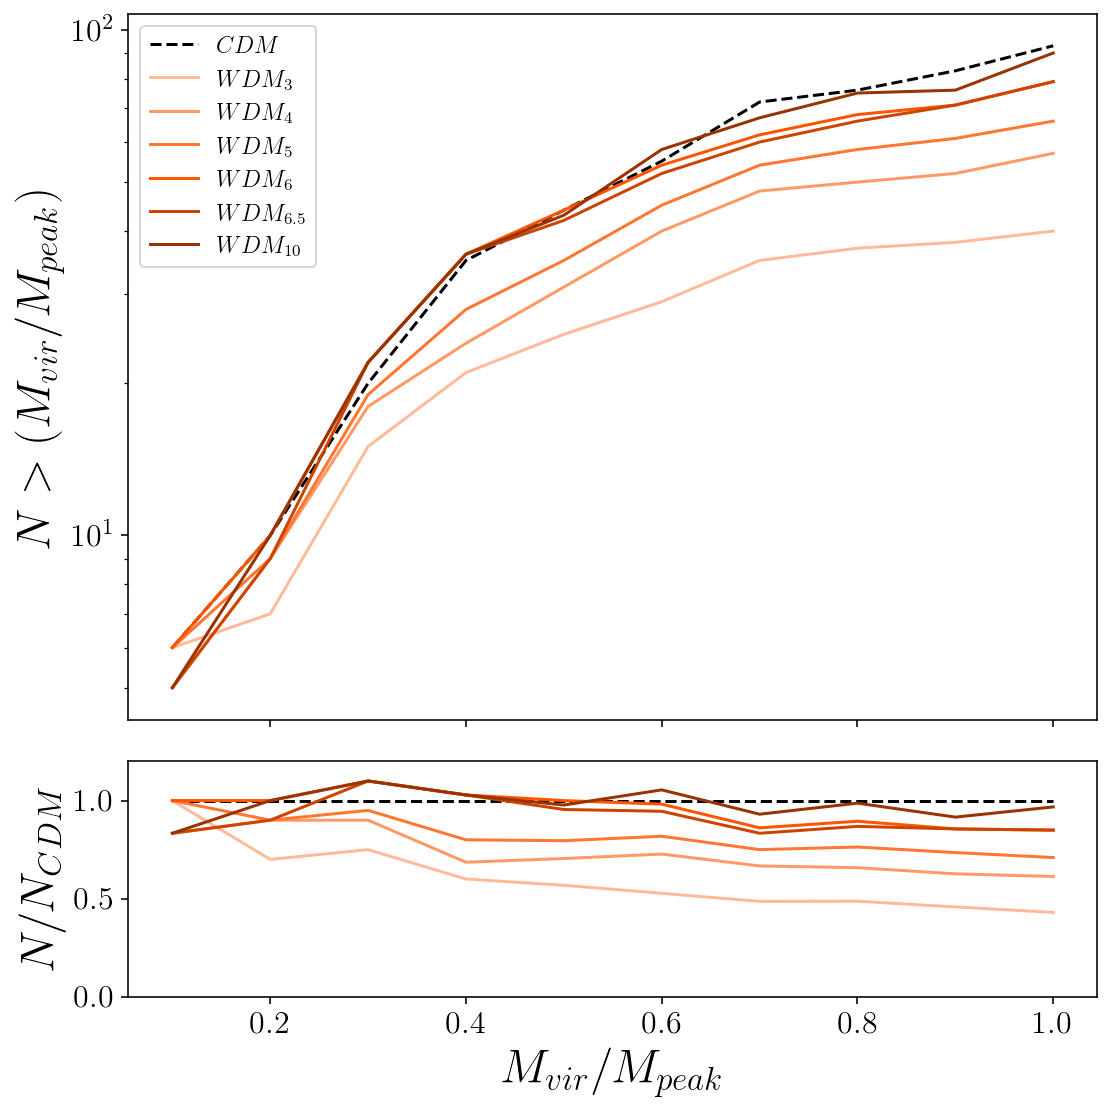

In [179]:
f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(8,8), gridspec_kw={'height_ratios':[3, 1]})

ax[0].plot(x_cdm, y_cdm, c=sim_colors['cdm'],label=r'$CDM$', ls='--')
ax[0].plot(x_wdm_3, y_wdm_3, c=sim_colors['wdm_3'],label=r'$WDM_3$')
ax[0].plot(x_wdm_4, y_wdm_4, c=sim_colors['wdm_4'],label=r'$WDM_4$')
ax[0].plot(x_wdm_5, y_wdm_5, c=sim_colors['wdm_5'],label=r'$WDM_5$')
ax[0].plot(x_wdm_6, y_wdm_6, c=sim_colors['wdm_6'],label=r'$WDM_6$')
ax[0].plot(x_wdm_65, y_wdm_65, c=sim_colors['wdm_6.5'],label=r'$WDM_{6.5}$')
ax[0].plot(x_wdm_10, y_wdm_10, c=sim_colors['wdm_10'],label=r'$WDM_{10}$')

ax[0].set_ylabel(r'$N > (M_{vir}/M_{peak})$', fontsize=24)
ax[0].set_yscale('log')
ax[0].legend(fontsize=12)

ax[1].plot(x_cdm, y_cdm/y_cdm, c=sim_colors['cdm'],label=r'$CDM$', ls='--')
ax[1].plot(x_wdm_3, y_wdm_3/y_cdm, c=sim_colors['wdm_3'],label=r'$WDM_3$')
ax[1].plot(x_wdm_4, y_wdm_4/y_cdm, c=sim_colors['wdm_4'],label=r'$WDM_4$')
ax[1].plot(x_wdm_5, y_wdm_5/y_cdm, c=sim_colors['wdm_5'],label=r'$WDM_5$')
ax[1].plot(x_wdm_6, y_wdm_6/y_cdm, c=sim_colors['wdm_6'],label=r'$WDM_6$')
ax[1].plot(x_wdm_65, y_wdm_65/y_cdm, c=sim_colors['wdm_6.5'],label=r'$WDM_{6.5}$')
ax[1].plot(x_wdm_10, y_wdm_10/y_cdm, c=sim_colors['wdm_10'],label=r'$WDM_{10}$')

ax[1].set_xlabel(r'$M_{vir}/M_{peak}$', fontsize=24)
ax[1].set_ylabel(r'$N/N_{CDM}$', fontsize=24)
ax[1].set_ylim(0,1.2)
plt.tight_layout()

In [181]:

fdm_25 = hlist(halo_id=halo_id, model='fdm_25.9e-22eV')
fdm_69 = hlist(halo_id=halo_id, model='fdm_69.4e-22eV')
fdm_113 = hlist(halo_id=halo_id, model='fdm_113e-22eV')
fdm_151 = hlist(halo_id=halo_id, model='fdm_151e-22eV')
fdm_185 = hlist(halo_id=halo_id, model='fdm_185e-22eV')
fdm_490 = hlist(halo_id=halo_id, model='fdm_490e-22eV')

#...... intializing models, halo lists
cdm.load_hlists()
fdm_25.load_hlists()
fdm_69.load_hlists()
fdm_113.load_hlists()
fdm_151.load_hlists()
fdm_185.load_hlists()
fdm_490.load_hlists()

#...... intializing models, host main branch
cdm.load_hmb()
fdm_25.load_hmb()
fdm_69.load_hmb()
fdm_113.load_hmb()
fdm_151.load_hmb()
fdm_185.load_hmb()
fdm_490.load_hmb()


val_cdm, cum_cdm, base_cdm, mass_cut_cdm  = cdm.shmf(z=z, return_masscut_idx=True)
val_fdm_25, cum_fdm_25, discard, mass_cut_fdm_25  = fdm_25.shmf(z=z, return_masscut_idx=True)
val_fdm_69, cum_fdm_69, discard, mass_cut_fdm_69  = fdm_69.shmf(z=z, return_masscut_idx=True)
val_fdm_113, cum_fdm_113, discard, mass_cut_fdm_113  = fdm_113.shmf(z=z, return_masscut_idx=True)
val_fdm_151, cum_fdm_151, discard, mass_cut_fdm_151  = fdm_151.shmf(z=z, return_masscut_idx=True)
val_fdm_185, cum_fdm_185, discard, mass_cut_fdm_185  = fdm_185.shmf(z=z, return_masscut_idx=True)
val_fdm_490, cum_fdm_490, discard, mass_cut_fdm_490  = fdm_490.shmf(z=z, return_masscut_idx=True)

halos_cdm, subhalos_cdm = cdm.get_z(z)
halos_fdm_25, subhalos_fdm_25 = fdm_25.get_z(z)
halos_fdm_69, subhalos_fdm_69 = fdm_69.get_z(z)
halos_fdm_113, subhalos_fdm_113 = fdm_113.get_z(z)
halos_fdm_151, subhalos_fdm_151 = fdm_151.get_z(z)
halos_fdm_185, subhalos_fdm_185 = fdm_185.get_z(z)
halos_fdm_490, subhalos_fdm_490 = fdm_490.get_z(z)

In [182]:

x_fdm_25, y_fdm_25 = get_plottables(subhalos_fdm_25, mass_cut_fdm_25)
x_fdm_69, y_fdm_69 = get_plottables(subhalos_fdm_69, mass_cut_fdm_69)
x_fdm_113, y_fdm_113 = get_plottables(subhalos_fdm_113, mass_cut_fdm_113)
x_fdm_151, y_fdm_151 = get_plottables(subhalos_fdm_151, mass_cut_fdm_151)
x_fdm_185, y_fdm_185 = get_plottables(subhalos_fdm_185, mass_cut_fdm_185)
x_fdm_490, y_fdm_490 = get_plottables(subhalos_fdm_490, mass_cut_fdm_490)

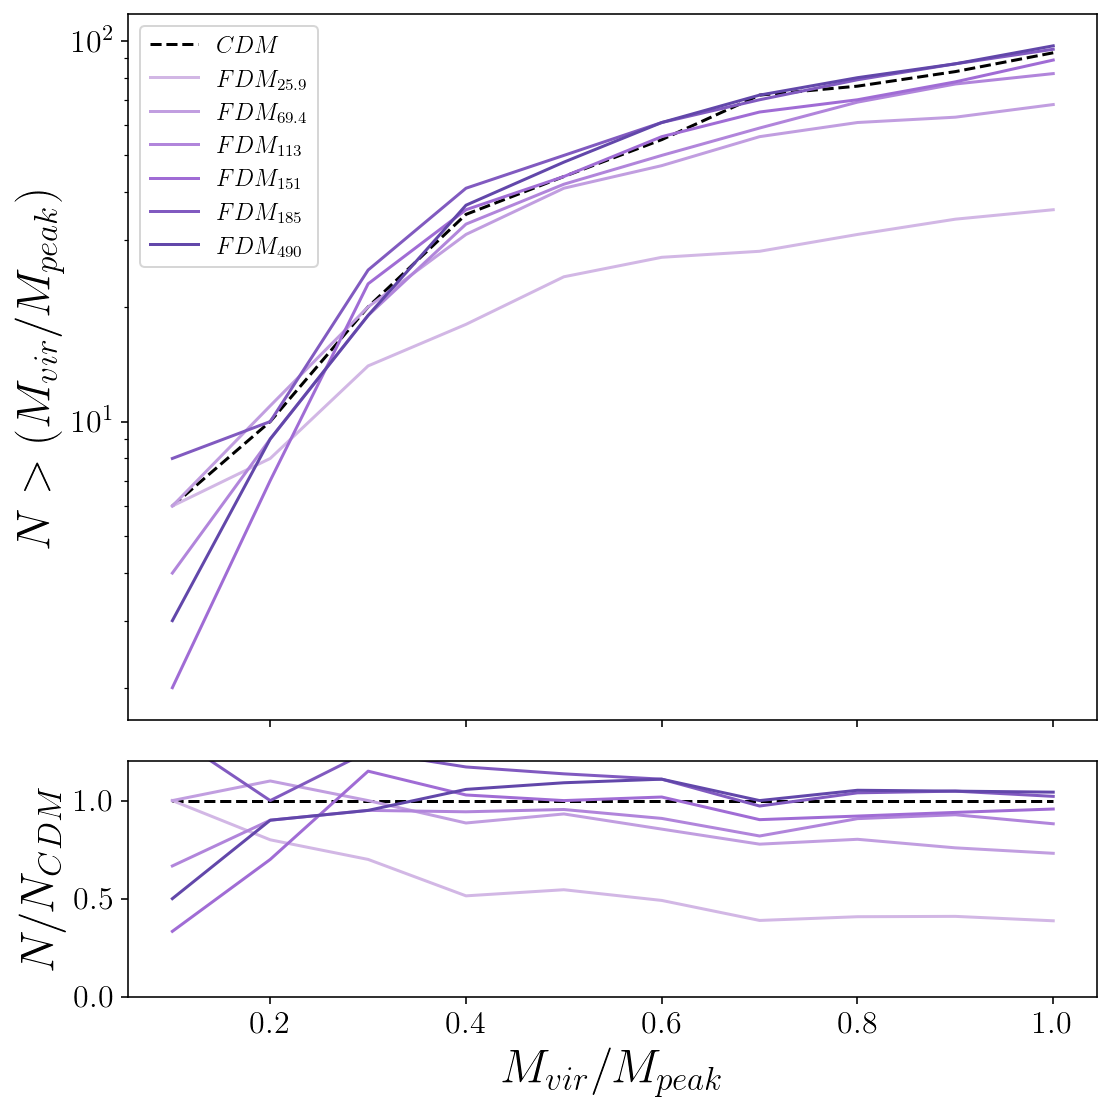

In [184]:
f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(8,8), gridspec_kw={'height_ratios':[3, 1]})

ax[0].plot(x_cdm, y_cdm, c=sim_colors['cdm'],label=r'$CDM$', ls='--')
ax[0].plot(x_fdm_25, y_fdm_25, c=sim_colors['fdm_25.9e-22eV'],label=r'$FDM_{25.9}$')
ax[0].plot(x_fdm_69, y_fdm_69, c=sim_colors['fdm_69.4e-22eV'],label=r'$FDM_{69.4}$')
ax[0].plot(x_fdm_113, y_fdm_113, c=sim_colors['fdm_113e-22eV'],label=r'$FDM_{113}$')
ax[0].plot(x_fdm_151, y_fdm_151, c=sim_colors['fdm_151e-22eV'],label=r'$FDM_{151}$')
ax[0].plot(x_fdm_185, y_fdm_185, c=sim_colors['fdm_185e-22eV'],label=r'$FDM_{185}$')
ax[0].plot(x_fdm_490, y_fdm_490, c=sim_colors['fdm_490e-22eV'],label=r'$FDM_{490}$')

ax[0].set_ylabel(r'$N > (M_{vir}/M_{peak})$', fontsize=24)
ax[0].set_yscale('log')
ax[0].legend(fontsize=12)

ax[1].plot(x_cdm, y_cdm/y_cdm, c=sim_colors['cdm'],label=r'$CDM$', ls='--')
ax[1].plot(x_fdm_25, y_fdm_25/y_cdm, c=sim_colors['fdm_25.9e-22eV'],label=r'$FDM_{25.9}$')
ax[1].plot(x_fdm_69, y_fdm_69/y_cdm, c=sim_colors['fdm_69.4e-22eV'],label=r'$FDM_{69.4}$')
ax[1].plot(x_fdm_113, y_fdm_113/y_cdm, c=sim_colors['fdm_113e-22eV'],label=r'$FDM_{113}$')
ax[1].plot(x_fdm_151, y_fdm_151/y_cdm, c=sim_colors['fdm_151e-22eV'],label=r'$FDM_{151}$')
ax[1].plot(x_fdm_185, y_fdm_185/y_cdm, c=sim_colors['fdm_185e-22eV'],label=r'$FDM_{185}$')
ax[1].plot(x_fdm_490, y_fdm_490/y_cdm, c=sim_colors['fdm_490e-22eV'],label=r'$FDM_{490}$')

ax[1].set_xlabel(r'$M_{vir}/M_{peak}$', fontsize=24)
ax[1].set_ylabel(r'$N/N_{CDM}$', fontsize=24)
ax[1].set_ylim(0,1.2)
plt.tight_layout()